In [7]:
# Import libraries
import numpy as np #for numeric operation
import tensorflow as tf # to create and train neural network model
import matplotlib.pyplot as plt # to visualize the data
from sklearn.model_selection import train_test_split #to divide the dataset become data training and test

In [8]:
# Generate synthetic season dataset
num_samples = 100 #100 random samples
num_features = 5 #5 random features
features = np.random.randn(num_samples, num_features) #random labels that represented 5 categories season
labels = np.random.randint(0, 5, size=num_samples)  # Updated to 5 classes

In [9]:
# Split the dataset into training and test sets
train_features, test_features, train_labels, test_labels = train_test_split(
    features, labels, test_size=0.2, random_state=42) #divide dataset become 20% data test and 80% data training

#Data training is used to train the model
#Data test is used to train model performa after data training

class_names = ['Summer', 'Spring', 'Autumn', 'Winter', 'Rainy']  #Season categories which will used to give label for prediction result

train_features = train_features / np.max(train_features)  #Normalization data training by divided the max value
test_features = test_features / np.max(test_features)  #Normalization data test by divided the max value

model = tf.keras.Sequential()  #Create the model
model.add(tf.keras.layers.Dense(128, activation='relu', input_shape=(num_features,)))
model.add(tf.keras.layers.Dense(5, activation='softmax'))

model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])  #Compale the model

history = model.fit(train_features, train_labels, epochs=100) #Train the model in 100 epoch

Epoch 1/100
3/3 [==============================] - 1s 4ms/step - loss: 1.5962 - accuracy: 0.2000
Epoch 2/100
3/3 [==============================] - 0s 8ms/step - loss: 1.5887 - accuracy: 0.2125
Epoch 3/100
3/3 [==============================] - 0s 4ms/step - loss: 1.5837 - accuracy: 0.2500
Epoch 4/100
3/3 [==============================] - 0s 4ms/step - loss: 1.5782 - accuracy: 0.3125
Epoch 5/100
3/3 [==============================] - 0s 4ms/step - loss: 1.5737 - accuracy: 0.3125
Epoch 6/100
3/3 [==============================] - 0s 4ms/step - loss: 1.5688 - accuracy: 0.3375
Epoch 7/100
3/3 [==============================] - 0s 4ms/step - loss: 1.5643 - accuracy: 0.3375
Epoch 8/100
3/3 [==============================] - 0s 4ms/step - loss: 1.5597 - accuracy: 0.3375
Epoch 9/100
3/3 [==============================] - 0s 4ms/step - loss: 1.5557 - accuracy: 0.3375
Epoch 10/100
3/3 [==============================] - 0s 5ms/step - loss: 1.5516 - accuracy: 0.3375
Epoch 11/100
3/3 [===========

In [10]:
# Get training and validation loss histories
training_loss = history.history['loss']
training_accuracy = history.history['accuracy']

# Create count of the number of epochs
epoch_count = range(1, len(training_loss) + 1)  # Corrected the range

#Take data training and calculate it and then create the diagram below

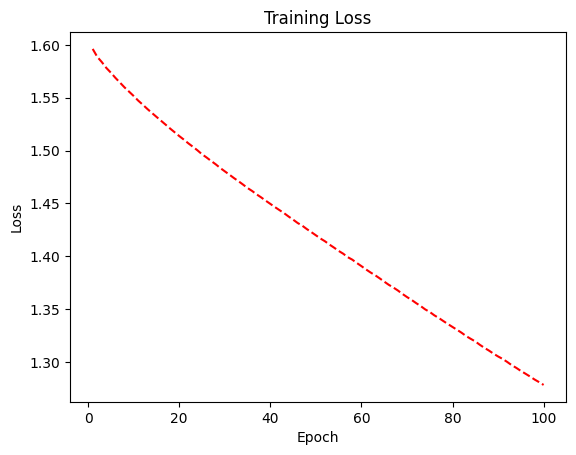

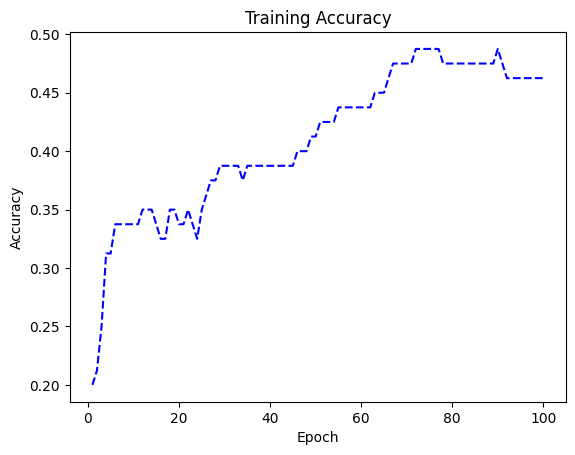

1/1 [==============================] - 0s 153ms/step - loss: 1.7024 - accuracy: 0.3000
Test accuracy: 0.30000001192092896


In [11]:
# Plot loss history
plt.figure(0) #creating new figure
plt.plot(epoch_count, training_loss, 'r--') #training loss values against the epoch count using a red dashes line.
plt.xlabel('Epoch') #represent the ecpoch
plt.ylabel('Loss') #represents the loss value
plt.title('Training Loss') #used to label the corresponding axes and provide a title for the plot
plt.show() #display the plot

# Plot accuracy history
plt.figure(1) #creating new figure
plt.plot(epoch_count, training_accuracy, 'b--') #training accurancy values against the epoch count using a blue dashes line.
plt.xlabel('Epoch') #represent the ecpoch
plt.ylabel('Accuracy') #represents the accuracy
plt.title('Training Accuracy') #used for labeling
plt.show() #display the plot

test_loss, test_acc = model.evaluate(test_features, test_labels)
#evaluates the trained model on a separate test dataset
#calculates the loss and accuracy of the model on the provided test features and corresponding labels

print('Test accuracy:', test_acc)

In [12]:
# Initialize a dictionary to store the best sample per class
best_samples = {class_name: {"sample": None, "confidence": -1} for class_name in class_names}

# Generate and store 1 best sample per class
for _ in range(5):  # Generate 5 samples for each class
    for class_name in class_names:
        # Generate a single sample for prediction
        sample = np.random.randn(1, num_features)
        sample = sample / np.max(sample)

        # Predict class probabilities for the sample
        single_prediction = model.predict(sample)

        # Get the predicted class index and confidence level
        class_index = np.argmax(single_prediction)
        confidence = np.max(single_prediction)

        # Update the best sample if the current sample has higher confidence
        if confidence > best_samples[class_name]["confidence"]:
            best_samples[class_name]["sample"] = sample
            best_samples[class_name]["confidence"] = confidence

# Display the best samples and their predictions for each class
for class_name, sample_info in best_samples.items():
    sample = sample_info["sample"]
    confidence = sample_info["confidence"]
    class_index = np.argmax(model.predict(sample))
    print(f"Class: {class_name}")
    print(f"Our network has concluded that the sample is {class_names[class_index]}")
    print("Confidence Level:", str(int(confidence * 100)) + "%")
    print("--------------------------")


1/1 [==============================] - 0s 22ms/step
Class: Summer
Our network has concluded that the sample is Rainy
Confidence Level: 90%
--------------------------
1/1 [==============================] - 0s 20ms/step
Class: Spring
Our network has concluded that the sample is Rainy
Confidence Level: 99%
--------------------------
1/1 [==============================] - 0s 20ms/step
Class: Autumn
Our network has concluded that the sample is Rainy
Confidence Level: 62%
--------------------------
1/1 [==============================] - 0s 35ms/step
Class: Winter
Our network has concluded that the sample is Spring
Confidence Level: 77%
--------------------------
1/1 [==============================] - 0s 39ms/step
Class: Rainy
Our network has concluded that the sample is Spring
Confidence Level: 63%
--------------------------
